In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.metrics import accuracy_score
data = pd.read_csv("TableData (6).csv")
data.head()

,Time,RT,kW_Tot,kW_RT,CH Load,CH1,CH2,CH3,CH4,kW_CHH,...,WBT,DeltaCT,Hz_CHP,Hz_CHS,Hz_CDS,Hz_CT,Precent_CH,Precent_CHP,Precent_CDS,Precent_CT
0,2023-12-01T00:00:00,201.2,208.7,1.037,39.6,0,1,0,0,135.6,...,75.6,-2.4,48,0,47,47.0,65.0,11.2,14.8,9.1
1,2023-12-01T00:10:00,180.5,203.5,1.127,38.4,0,1,0,0,130.4,...,75.6,-2.3,48,0,47,47.0,64.1,11.5,15.2,9.3
2,2023-12-01T00:20:00,170.2,200.8,1.179,37.6,0,1,0,0,127.8,...,75.6,-2.2,48,0,47,47.0,63.6,11.6,15.4,9.4
3,2023-12-01T00:30:00,184.9,201.2,1.088,37.8,0,1,0,0,128.3,...,75.6,-2.0,48,0,47,47.0,63.8,11.6,15.2,9.4
4,2023-12-01T00:40:00,176.4,181.4,1.028,34.6,0,1,0,0,117.6,...,75.6,-2.2,48,0,47,47.0,64.8,13.3,17.0,4.9


In [2]:
datas = pd.read_csv("sensors data (4).csv", encoding='ISO-8859-1')
datas.head()


,DateTime,RH,Temperature,WBT_C
0,2023-12-01 00:05:34.000,64.1,30.5,25.1
1,2023-12-01 00:15:34.000,64.1,30.4,25.0
2,2023-12-01 00:25:34.000,65.1,30.3,25.1
3,2023-12-01 00:35:34.000,65.0,30.3,25.1
4,2023-12-01 00:45:34.000,64.8,30.3,25.1


In [3]:
data['timestamp'] = pd.to_datetime(data['Time'])
datas['timestamp'] = pd.to_datetime(datas['DateTime'])

In [4]:
datas['timestamp_rounded'] = datas['timestamp'].dt.round('10min')
datas

,DateTime,RH,Temperature,WBT_C,timestamp,timestamp_rounded
0,2023-12-01 00:05:34.000,64.1,30.5,25.1,2023-12-01 00:05:34,2023-12-01 00:10:00
1,2023-12-01 00:15:34.000,64.1,30.4,25.0,2023-12-01 00:15:34,2023-12-01 00:20:00
2,2023-12-01 00:25:34.000,65.1,30.3,25.1,2023-12-01 00:25:34,2023-12-01 00:30:00
3,2023-12-01 00:35:34.000,65.0,30.3,25.1,2023-12-01 00:35:34,2023-12-01 00:40:00
4,2023-12-01 00:45:34.000,64.8,30.3,25.1,2023-12-01 00:45:34,2023-12-01 00:50:00
...,...,...,...,...,...,...
4446,2023-12-31 23:14:07.000,61.2,29.7,23.9,2023-12-31 23:14:07,2023-12-31 23:10:00
4447,2023-12-31 23:24:07.000,60.8,29.7,23.9,2023-12-31 23:24:07,2023-12-31 23:20:00
4448,2023-12-31 23:34:07.000,60.0,29.8,23.9,2023-12-31 23:34:07,2023-12-31 23:30:00
4449,2023-12-31 23:44:07.000,59.7,29.9,23.8,2023-12-31 23:44:07,2023-12-31 23:40:00


In [5]:
merged_df = pd.merge_asof(data.sort_values('timestamp'), 
                          datas.sort_values('timestamp_rounded'), 
                          left_on='timestamp', 
                          right_on='timestamp_rounded', 
                          direction='nearest')
merged_df.head()

,Time,RT,kW_Tot,kW_RT,CH Load,CH1,CH2,CH3,CH4,kW_CHH,...,Precent_CHP,Precent_CDS,Precent_CT,timestamp_x,DateTime,RH,Temperature,WBT_C,timestamp_y,timestamp_rounded
0,2023-12-01T00:00:00,201.2,208.7,1.037,39.6,0,1,0,0,135.6,...,11.2,14.8,9.1,2023-12-01 00:00:00,2023-12-01 00:05:34.000,64.1,30.5,25.1,2023-12-01 00:05:34,2023-12-01 00:10:00
1,2023-12-01T00:10:00,180.5,203.5,1.127,38.4,0,1,0,0,130.4,...,11.5,15.2,9.3,2023-12-01 00:10:00,2023-12-01 00:05:34.000,64.1,30.5,25.1,2023-12-01 00:05:34,2023-12-01 00:10:00
2,2023-12-01T00:20:00,170.2,200.8,1.179,37.6,0,1,0,0,127.8,...,11.6,15.4,9.4,2023-12-01 00:20:00,2023-12-01 00:15:34.000,64.1,30.4,25.0,2023-12-01 00:15:34,2023-12-01 00:20:00
3,2023-12-01T00:30:00,184.9,201.2,1.088,37.8,0,1,0,0,128.3,...,11.6,15.2,9.4,2023-12-01 00:30:00,2023-12-01 00:25:34.000,65.1,30.3,25.1,2023-12-01 00:25:34,2023-12-01 00:30:00
4,2023-12-01T00:40:00,176.4,181.4,1.028,34.6,0,1,0,0,117.6,...,13.3,17.0,4.9,2023-12-01 00:40:00,2023-12-01 00:35:34.000,65.0,30.3,25.1,2023-12-01 00:35:34,2023-12-01 00:40:00


In [6]:
merged_df["Time"]

0       2023-12-01T00:00:00
1       2023-12-01T00:10:00
2       2023-12-01T00:20:00
3       2023-12-01T00:30:00
4       2023-12-01T00:40:00
               ...         
4436    2023-12-31T23:20:00
4437    2023-12-31T23:30:00
4438    2023-12-31T23:40:00
4439    2023-12-31T23:50:00
4440    2024-01-01T00:00:00
Name: Time, Length: 4441, dtype: object

In [7]:
hotel_df = pd.read_csv("hotel_occupancy.csv")
hotel_df

,Time,Hotel_Occupancy
0,01-12-23 0:00,49.963851
1,01-12-23 0:10,71.916653
2,01-12-23 0:20,79.582877
3,01-12-23 0:30,83.620848
4,01-12-23 0:40,92.757124
...,...,...
4435,31-12-23 19:10,89.634256
4436,31-12-23 19:20,96.087523
4437,31-12-23 19:30,90.036627
4438,31-12-23 19:40,95.897084


In [8]:
merged_df['timestamp'] = pd.to_datetime(merged_df['Time'])
hotel_df['timestamp'] = pd.to_datetime(hotel_df['Time'], format='%d-%m-%y %H:%M')
                                       

In [9]:
merged_df_final = pd.merge_asof(
    merged_df.sort_values('timestamp'), 
    hotel_df.sort_values('timestamp'), 
    on='timestamp', 
    direction='nearest'
)


In [10]:
import datetime
import pandas as pd

def find_day(timestamp_str):
    # Parse the timestamp string using the appropriate format
    date_obj = datetime.datetime.strptime(timestamp_str, '%Y-%m-%dT%H:%M:%S')
    
    # Return the day of the week as an integer (0 = Monday, 6 = Sunday)
    return date_obj.weekday()

# Assuming merged_df_final is your DataFrame with 'Time_x' column
merged_df_final['weekday'] = merged_df_final['Time_x'].apply(find_day)




In [11]:
merged_df_final.tail()

,Time_x,RT,kW_Tot,kW_RT,CH Load,CH1,CH2,CH3,CH4,kW_CHH,...,DateTime,RH,Temperature,WBT_C,timestamp_y,timestamp_rounded,timestamp,Time_y,Hotel_Occupancy,weekday
4436,2023-12-31T23:20:00,291.5,218.9,0.751,43.2,1,0,0,0,146.5,...,2023-12-31 23:24:07.000,60.8,29.7,23.9,2023-12-31 23:24:07,2023-12-31 23:20:00,2023-12-31 23:20:00,31-12-23 19:50,70.888887,6
4437,2023-12-31T23:30:00,298.4,237.3,0.795,48.6,1,0,0,0,164.9,...,2023-12-31 23:34:07.000,60.0,29.8,23.9,2023-12-31 23:34:07,2023-12-31 23:30:00,2023-12-31 23:30:00,31-12-23 19:50,70.888887,6
4438,2023-12-31T23:40:00,303.1,247.9,0.818,51.6,1,0,0,0,175.2,...,2023-12-31 23:44:07.000,59.7,29.9,23.8,2023-12-31 23:44:07,2023-12-31 23:40:00,2023-12-31 23:40:00,31-12-23 19:50,70.888887,6
4439,2023-12-31T23:50:00,287.6,227.5,0.791,45.8,1,0,0,0,155.5,...,2023-12-31 23:54:07.000,59.4,29.9,23.8,2023-12-31 23:54:07,2023-12-31 23:50:00,2023-12-31 23:50:00,31-12-23 19:50,70.888887,6
4440,2024-01-01T00:00:00,300.6,252.1,0.839,53.0,1,0,0,0,179.9,...,2023-12-31 23:54:07.000,59.4,29.9,23.8,2023-12-31 23:54:07,2023-12-31 23:50:00,2024-01-01 00:00:00,31-12-23 19:50,70.888887,0


In [12]:
merged_df_final.isnull().sum()

Time_x               0
RT                   0
kW_Tot               0
kW_RT                0
CH Load              0
CH1                  0
CH2                  0
CH3                  0
CH4                  0
kW_CHH               0
kW_CHP               0
kW_CHS               0
kW_CDS               0
kW_CT                0
GPM                  0
DeltaCHW             0
CHWS                 0
CHWR                 0
DeltaCDW             0
CDHI                 0
CDLO                 0
WBT                  0
DeltaCT              0
Hz_CHP               0
Hz_CHS               0
Hz_CDS               0
Hz_CT                0
Precent_CH           0
Precent_CHP          0
Precent_CDS          0
Precent_CT           0
timestamp_x          0
DateTime             0
RH                   0
Temperature          0
WBT_C                0
timestamp_y          0
timestamp_rounded    0
timestamp            0
Time_y               0
Hotel_Occupancy      0
weekday              0
dtype: int64

In [13]:
data = merged_df_final.drop(columns=['timestamp_x', 'DateTime', 'timestamp_y', 'timestamp_rounded', 'timestamp', 'Time_y'])

In [14]:
data.head()

,Time_x,RT,kW_Tot,kW_RT,CH Load,CH1,CH2,CH3,CH4,kW_CHH,...,Hz_CT,Precent_CH,Precent_CHP,Precent_CDS,Precent_CT,RH,Temperature,WBT_C,Hotel_Occupancy,weekday
0,2023-12-01T00:00:00,201.2,208.7,1.037,39.6,0,1,0,0,135.6,...,47.0,65.0,11.2,14.8,9.1,64.1,30.5,25.1,49.963851,4
1,2023-12-01T00:10:00,180.5,203.5,1.127,38.4,0,1,0,0,130.4,...,47.0,64.1,11.5,15.2,9.3,64.1,30.5,25.1,71.916653,4
2,2023-12-01T00:20:00,170.2,200.8,1.179,37.6,0,1,0,0,127.8,...,47.0,63.6,11.6,15.4,9.4,64.1,30.4,25.0,79.582877,4
3,2023-12-01T00:30:00,184.9,201.2,1.088,37.8,0,1,0,0,128.3,...,47.0,63.8,11.6,15.2,9.4,65.1,30.3,25.1,83.620848,4
4,2023-12-01T00:40:00,176.4,181.4,1.028,34.6,0,1,0,0,117.6,...,47.0,64.8,13.3,17.0,4.9,65.0,30.3,25.1,92.757124,4


In [15]:
data['timestamp'] = pd.to_datetime(data['Time_x'])
data['year'] = data['timestamp'].dt.year
data['month'] = data['timestamp'].dt.month
data['day'] = data['timestamp'].dt.day
data['hour'] = data['timestamp'].dt.hour
data['minute'] = data['timestamp'].dt.minute




In [16]:
data.head()

,Time_x,RT,kW_Tot,kW_RT,CH Load,CH1,CH2,CH3,CH4,kW_CHH,...,Temperature,WBT_C,Hotel_Occupancy,weekday,timestamp,year,month,day,hour,minute
0,2023-12-01T00:00:00,201.2,208.7,1.037,39.6,0,1,0,0,135.6,...,30.5,25.1,49.963851,4,2023-12-01 00:00:00,2023,12,1,0,0
1,2023-12-01T00:10:00,180.5,203.5,1.127,38.4,0,1,0,0,130.4,...,30.5,25.1,71.916653,4,2023-12-01 00:10:00,2023,12,1,0,10
2,2023-12-01T00:20:00,170.2,200.8,1.179,37.6,0,1,0,0,127.8,...,30.4,25.0,79.582877,4,2023-12-01 00:20:00,2023,12,1,0,20
3,2023-12-01T00:30:00,184.9,201.2,1.088,37.8,0,1,0,0,128.3,...,30.3,25.1,83.620848,4,2023-12-01 00:30:00,2023,12,1,0,30
4,2023-12-01T00:40:00,176.4,181.4,1.028,34.6,0,1,0,0,117.6,...,30.3,25.1,92.757124,4,2023-12-01 00:40:00,2023,12,1,0,40


In [17]:
# Drop the original timestamp if not needed
data = data.drop(columns=['Time_x'])
data = data.drop(columns=['timestamp'])
data.head()

,RT,kW_Tot,kW_RT,CH Load,CH1,CH2,CH3,CH4,kW_CHH,kW_CHP,...,RH,Temperature,WBT_C,Hotel_Occupancy,weekday,year,month,day,hour,minute
0,201.2,208.7,1.037,39.6,0,1,0,0,135.6,23.3,...,64.1,30.5,25.1,49.963851,4,2023,12,1,0,0
1,180.5,203.5,1.127,38.4,0,1,0,0,130.4,23.3,...,64.1,30.5,25.1,71.916653,4,2023,12,1,0,10
2,170.2,200.8,1.179,37.6,0,1,0,0,127.8,23.3,...,64.1,30.4,25.0,79.582877,4,2023,12,1,0,20
3,184.9,201.2,1.088,37.8,0,1,0,0,128.3,23.3,...,65.1,30.3,25.1,83.620848,4,2023,12,1,0,30
4,176.4,181.4,1.028,34.6,0,1,0,0,117.6,24.1,...,65.0,30.3,25.1,92.757124,4,2023,12,1,0,40


In [18]:
# excel_filename = 'test_data.xlsx'
# data.to_excel(excel_filename, index=False)

In [19]:
x = data.drop(columns=['RT', 'CH Load', 'GPM', 'DeltaCHW', 'CHWS', 'CHWR'])
x.head()

,kW_Tot,kW_RT,CH1,CH2,CH3,CH4,kW_CHH,kW_CHP,kW_CHS,kW_CDS,...,RH,Temperature,WBT_C,Hotel_Occupancy,weekday,year,month,day,hour,minute
0,208.7,1.037,0,1,0,0,135.6,23.3,0,30.9,...,64.1,30.5,25.1,49.963851,4,2023,12,1,0,0
1,203.5,1.127,0,1,0,0,130.4,23.3,0,30.9,...,64.1,30.5,25.1,71.916653,4,2023,12,1,0,10
2,200.8,1.179,0,1,0,0,127.8,23.3,0,30.9,...,64.1,30.4,25.0,79.582877,4,2023,12,1,0,20
3,201.2,1.088,0,1,0,0,128.3,23.3,0,30.6,...,65.1,30.3,25.1,83.620848,4,2023,12,1,0,30
4,181.4,1.028,0,1,0,0,117.6,24.1,0,30.8,...,65.0,30.3,25.1,92.757124,4,2023,12,1,0,40


In [20]:
y = data[['RT', 'CH Load', 'GPM', 'DeltaCHW', 'CHWS', 'CHWR']]
y.head()

,RT,CH Load,GPM,DeltaCHW,CHWS,CHWR
0,201.2,39.6,1238.0,3.9,47.0,50.9
1,180.5,38.4,1238.0,3.5,47.3,50.8
2,170.2,37.6,1238.0,3.3,47.4,50.7
3,184.9,37.8,1233.0,3.6,47.2,50.8
4,176.4,34.6,1282.8,3.3,47.5,50.8


In [21]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size= 0.3,random_state = 0)

In [22]:

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np


rf = RandomForestRegressor(n_estimators=100, random_state=42)


rf.fit(x_train, y_train)


y_pred = rf.predict(x_test)

print("Metrics\n")
# 1. Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error (MSE): {mse}')

# 2. Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)
print(f'Root Mean Squared Error (RMSE): {rmse}')

# 3. Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)
print(f'Mean Absolute Error (MAE): {mae}')

# 4. R-squared (R²)
r2 = r2_score(y_test, y_pred)
print(f'R-squared (R²): {r2}')


print("\nAccuracy : ",r2*100)


Metrics

Mean Squared Error (MSE): 73.47885134408592
Root Mean Squared Error (RMSE): 8.571980596343293
Mean Absolute Error (MAE): 2.1888747186796724
R-squared (R²): 0.9529640422292912

Accuracy :  95.29640422292913


In [23]:
import joblib

model_filename = 'random_forest_model.pkl'
joblib.dump(rf, model_filename)
print(f'Model saved as {model_filename}')

Model saved as random_forest_model.pkl


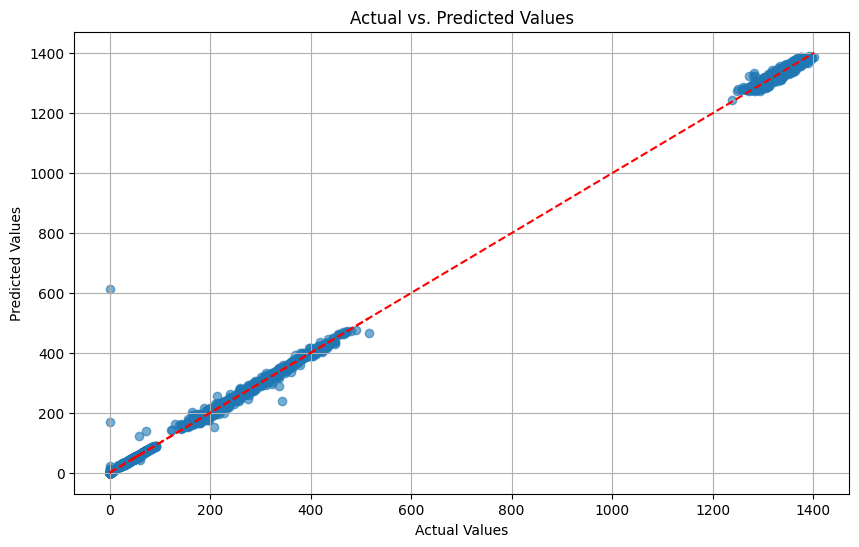

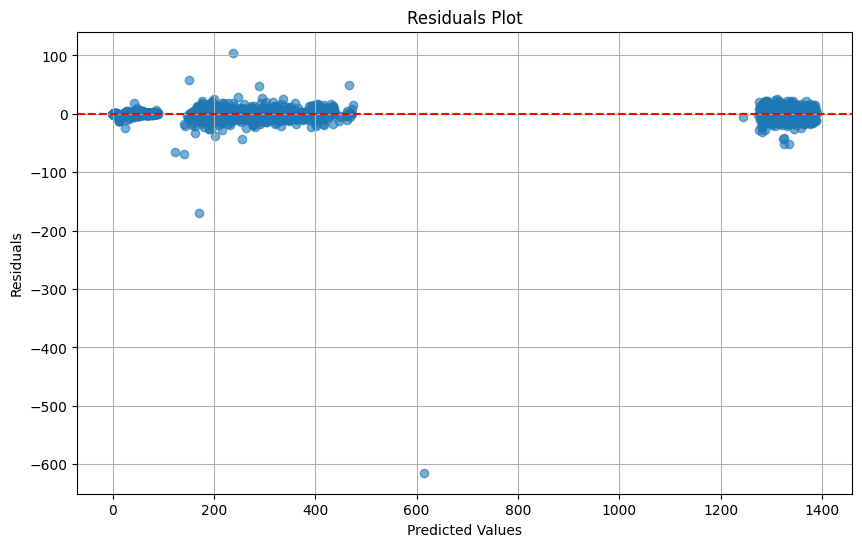

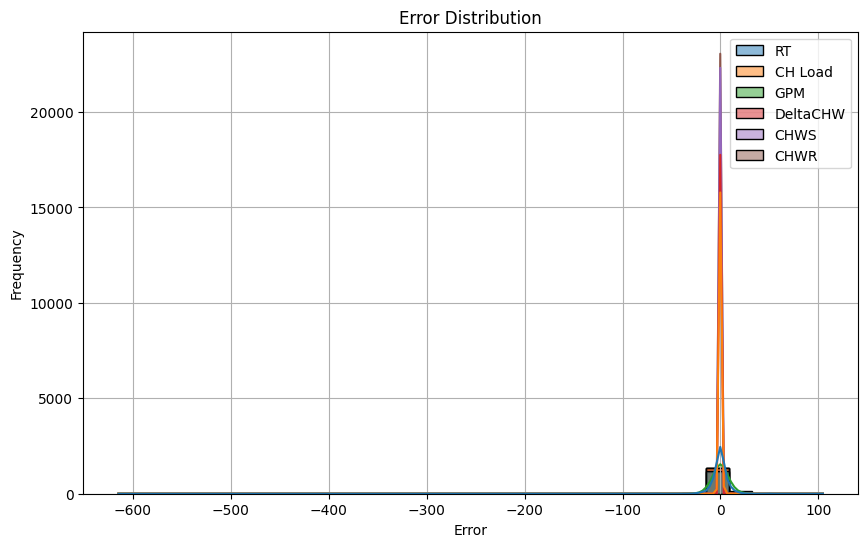

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming y_test and y_pred are your actual and predicted values

# 1. Actual vs. Predicted Values Plot
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # Line for perfect predictions
plt.title('Actual vs. Predicted Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.grid()
plt.show()

# 2. Residuals Plot
residuals = y_test - y_pred
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, alpha=0.6)
plt.axhline(0, color='r', linestyle='--')
plt.title('Residuals Plot')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.grid()
plt.show()

# 3. Error Distribution Plot
plt.figure(figsize=(10, 6))
sns.histplot(residuals, bins=30, kde=True)
plt.title('Error Distribution')
plt.xlabel('Error')
plt.ylabel('Frequency')
plt.grid()
plt.show()


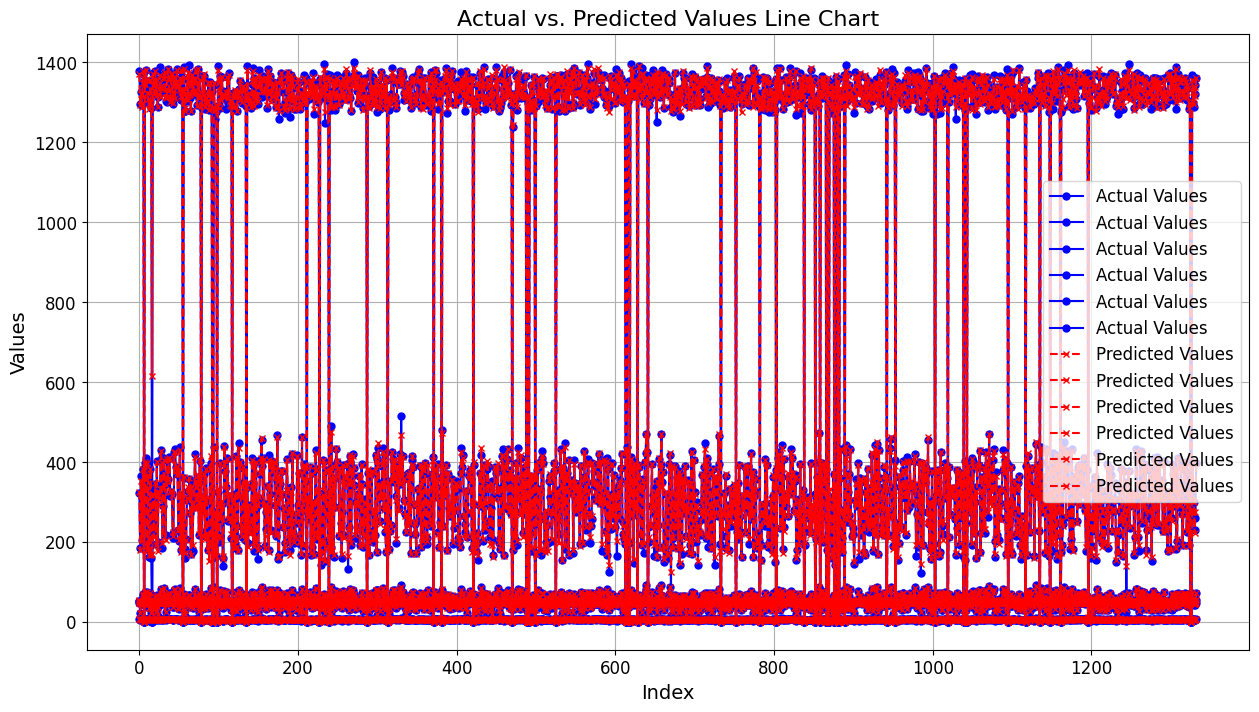

In [25]:
import matplotlib.pyplot as plt

# Assuming y_test and y_pred are NumPy arrays
plt.figure(figsize=(15, 8))  # Increase the figure size

# Create an index for the x-axis
index = range(len(y_test))

# Plot the actual values
plt.plot(index, y_test, label='Actual Values', color='blue', marker='o', linestyle='-', markersize=5)

# Plot the predicted values
plt.plot(index, y_pred, label='Predicted Values', color='red', marker='x', linestyle='--', markersize=5)

# Add titles and labels
plt.title('Actual vs. Predicted Values Line Chart', fontsize=16)  # Increase title font size
plt.xlabel('Index', fontsize=14)  # Increase x-label font size
plt.ylabel('Values', fontsize=14)  # Increase y-label font size
plt.legend(fontsize=12)  # Increase legend font size
plt.grid(True)  # Show grid
plt.xticks(fontsize=12)  # Increase x-tick font size
plt.yticks(fontsize=12)  # Increase y-tick font size

plt.show()


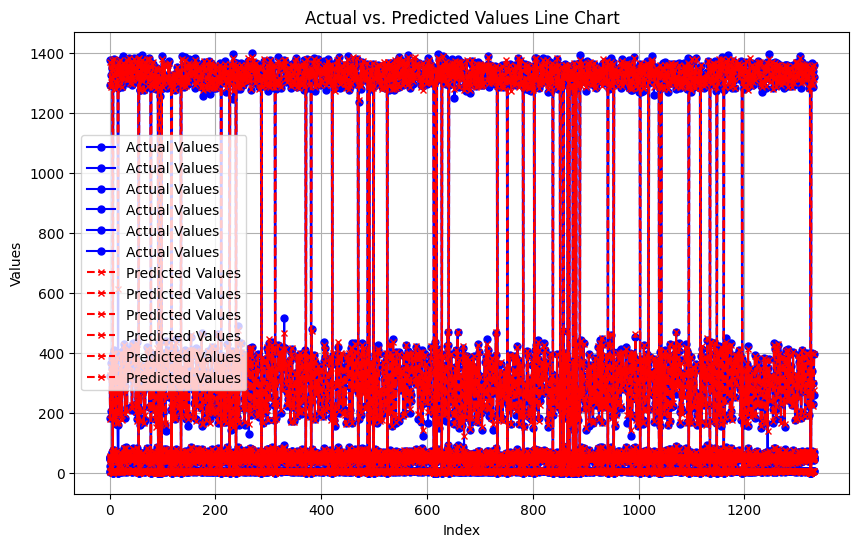

In [26]:
import matplotlib.pyplot as plt

# Assuming y_test and y_pred are NumPy arrays (or lists)
plt.figure(figsize=(10, 6))

# Create an index for the x-axis
index = range(len(y_test))

# Plot the actual values
plt.plot(index, y_test, label='Actual Values', color='blue', marker='o', linestyle='-', markersize=5)

# Plot the predicted values
plt.plot(index, y_pred, label='Predicted Values', color='red', marker='x', linestyle='--', markersize=5)

# Add titles and labels
plt.title('Actual vs. Predicted Values Line Chart')
plt.xlabel('Index')
plt.ylabel('Values')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()


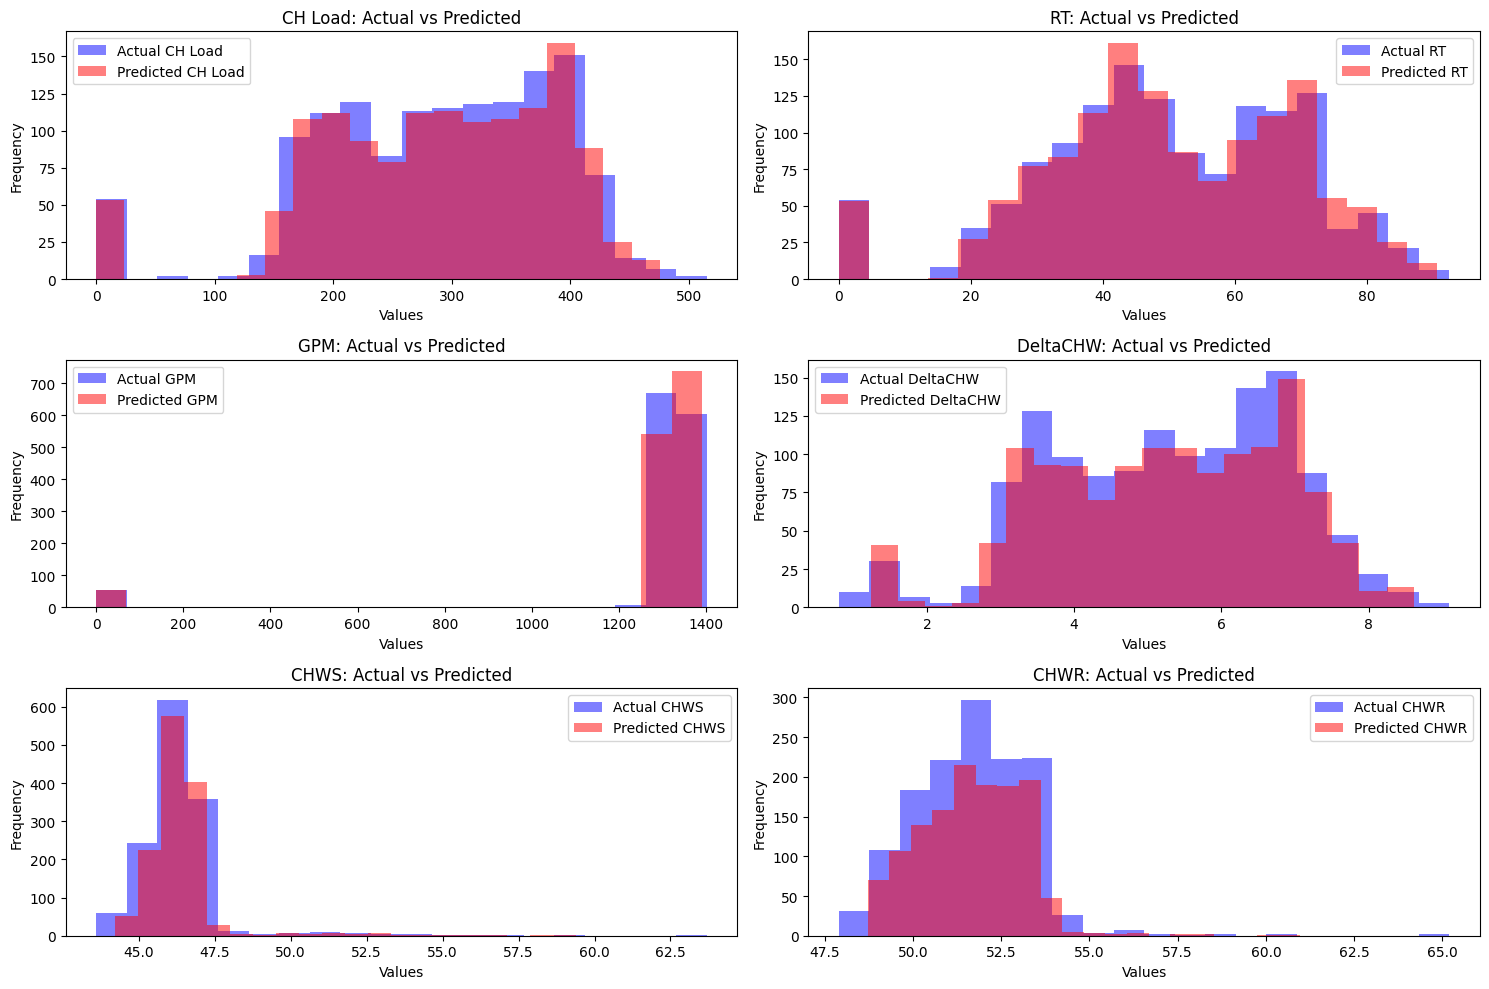

In [27]:
import matplotlib.pyplot as plt

# Assuming y_test and y_pred are either 2D NumPy arrays or DataFrames with 6 columns
target_names = ['CH Load', 'RT', 'GPM', 'DeltaCHW', 'CHWS', 'CHWR']
num_columns = y_test.shape[1]  # Number of columns (assumed to be 6)

plt.figure(figsize=(15, 10))  # Increase the figure size for better visualization

# Loop through each column and plot the histograms for y_test and y_pred
for i in range(num_columns):
    plt.subplot(3, 2, i + 1)  # Create a 3x2 grid for the plots
    
    # Use .iloc to handle both DataFrame and array indexing
    actual_values = y_test.iloc[:, i] if isinstance(y_test, pd.DataFrame) else y_test[:, i]
    predicted_values = y_pred.iloc[:, i] if isinstance(y_pred, pd.DataFrame) else y_pred[:, i]
    
    # Plot histogram for the actual values
    plt.hist(actual_values, bins=20, alpha=0.5, label=f'Actual {target_names[i]}', color='blue')
    
    # Plot histogram for the predicted values
    plt.hist(predicted_values, bins=20, alpha=0.5, label=f'Predicted {target_names[i]}', color='red')
    
    # Add titles and labels
    plt.title(f'{target_names[i]}: Actual vs Predicted', fontsize=12)
    plt.xlabel('Values')
    plt.ylabel('Frequency')
    plt.legend()

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()


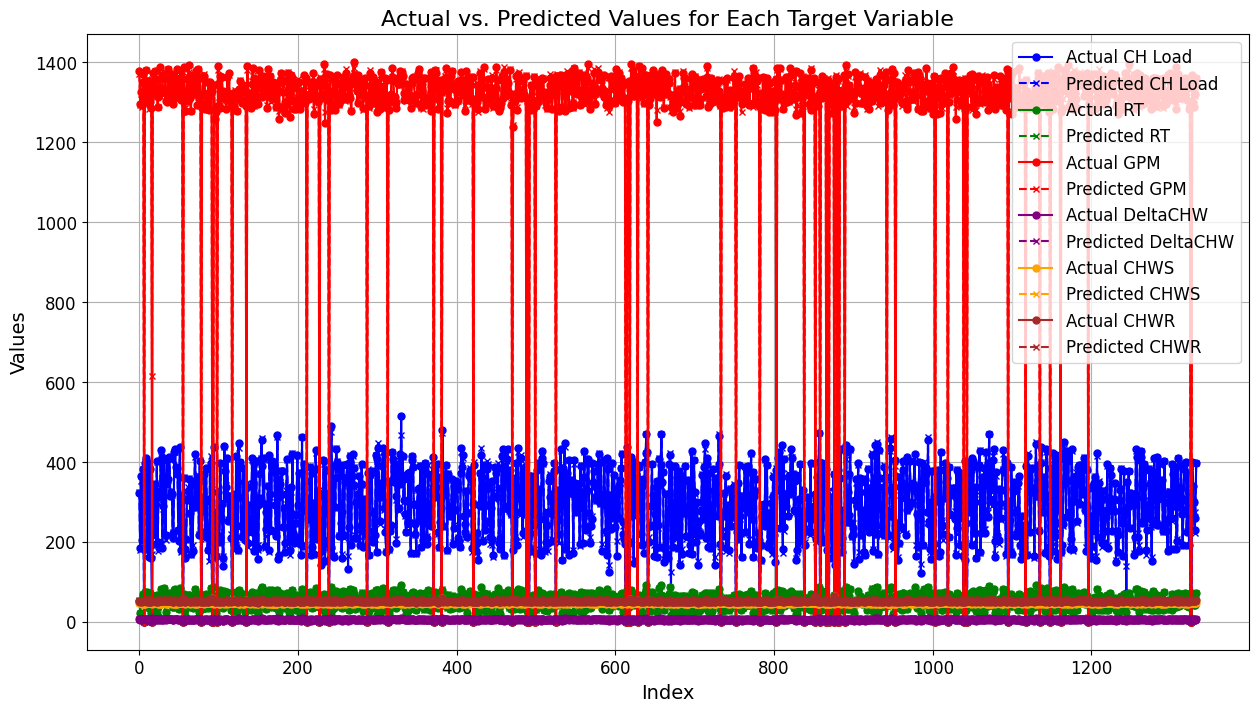

In [28]:
import matplotlib.pyplot as plt

# Assuming y_test and y_pred are 2D arrays or DataFrames
target_names = ['CH Load', 'RT', 'GPM', 'DeltaCHW', 'CHWS', 'CHWR']
colors = ['blue', 'green', 'red', 'purple', 'orange', 'brown']  # Different colors for each header
num_columns = y_test.shape[1]  # Number of columns (assumed to be 6)

plt.figure(figsize=(15, 8))  # Increase the figure size

# Create an index for the x-axis
index = range(len(y_test))

# Plot each header (column) with different colors for both actual and predicted values
for i in range(num_columns):
    # Get the actual and predicted values
    actual_values = y_test.iloc[:, i] if isinstance(y_test, pd.DataFrame) else y_test[:, i]
    predicted_values = y_pred.iloc[:, i] if isinstance(y_pred, pd.DataFrame) else y_pred[:, i]
    
    # Plot the actual values for each header
    plt.plot(index, actual_values, label=f'Actual {target_names[i]}', color=colors[i], marker='o', linestyle='-', markersize=5)
    
    # Plot the predicted values for each header
    plt.plot(index, predicted_values, label=f'Predicted {target_names[i]}', color=colors[i], marker='x', linestyle='--', markersize=5)

# Add titles and labels
plt.title('Actual vs. Predicted Values for Each Target Variable', fontsize=16)  # Increase title font size
plt.xlabel('Index', fontsize=14)  # Increase x-label font size
plt.ylabel('Values', fontsize=14)  # Increase y-label font size
plt.legend(fontsize=12, loc='upper right')  # Increase legend font size and place it at the top right
plt.grid(True)  # Show grid
plt.xticks(fontsize=12)  # Increase x-tick font size
plt.yticks(fontsize=12)  # Increase y-tick font size

# Show the plot
plt.show()


In [29]:
import datetime

def find_day(timestamp_str):
    # Parse the timestamp string using the appropriate format
    date_obj = datetime.datetime.strptime(timestamp_str, '%Y-%m-%dT%H:%M:%S')
    
    # Return the day of the week
    return date_obj.strftime('%A')

# Example usage
print(find_day("2023-12-01T00:00:00"))  # Output will be 'Friday'

Friday
